# Heart Disease Prediction
This machine learning project is about predicting heart disease from the dataset from kaggle  (https://www.kaggle.com/ronitf/heart-disease-uci)

Import all the libraries which are needed. For visualization, I will use pyplot subpackage of matplotlib, use rcParams to add styling to the plots and rainbow for colors. For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn


For processing the data, I'll import a few libraries. To split the available dataset for testing and training, I'll use the train_test_split method. To scale the features, I am using StandardScaler.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Next, I'll import all the Machine Learning algorithms I will be using.

1. K Neighbors Classifier
2. upport Vector Classifier
3. Decision Tree Classifier
4. Random Forest Classifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Import dataset
Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file dataset.csv. I'll use the pandas read_csv method to read the dataset.

In [7]:
dataset=pd.read_csv('dataset.csv')

In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Understanding the Data by Visualizing

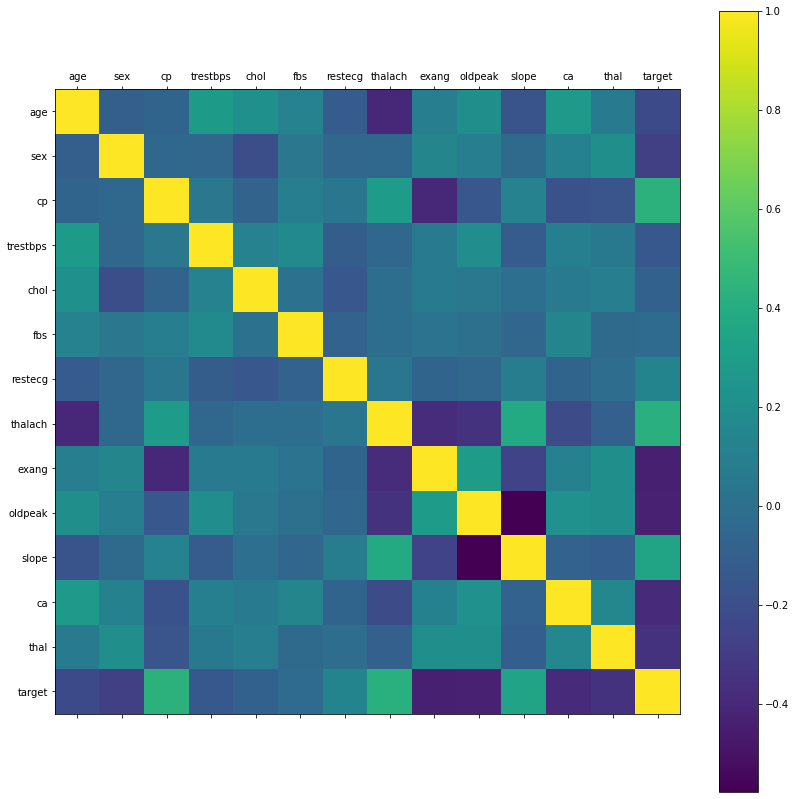

In [15]:
rcParams['figure.figsize']=20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]),dataset.columns )
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

Another way to plot the correlation matrix  heatmap

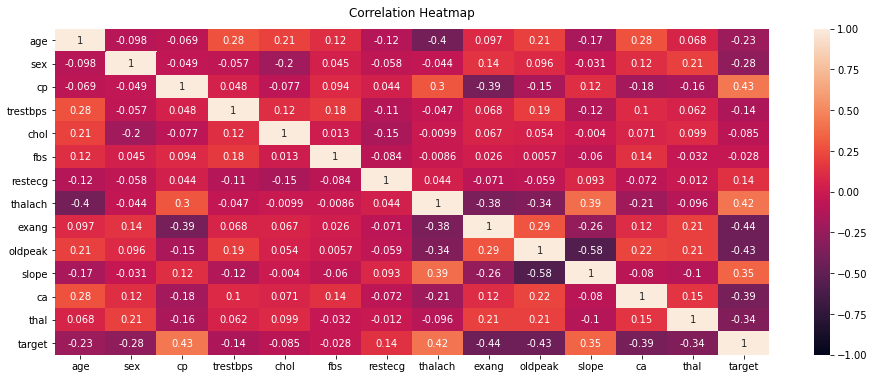

In [21]:
plt.figure(figsize=(16, 6))
corrMatrix = dataset.corr()
heatmap=sn.heatmap(corrMatrix, vmin=-1, vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

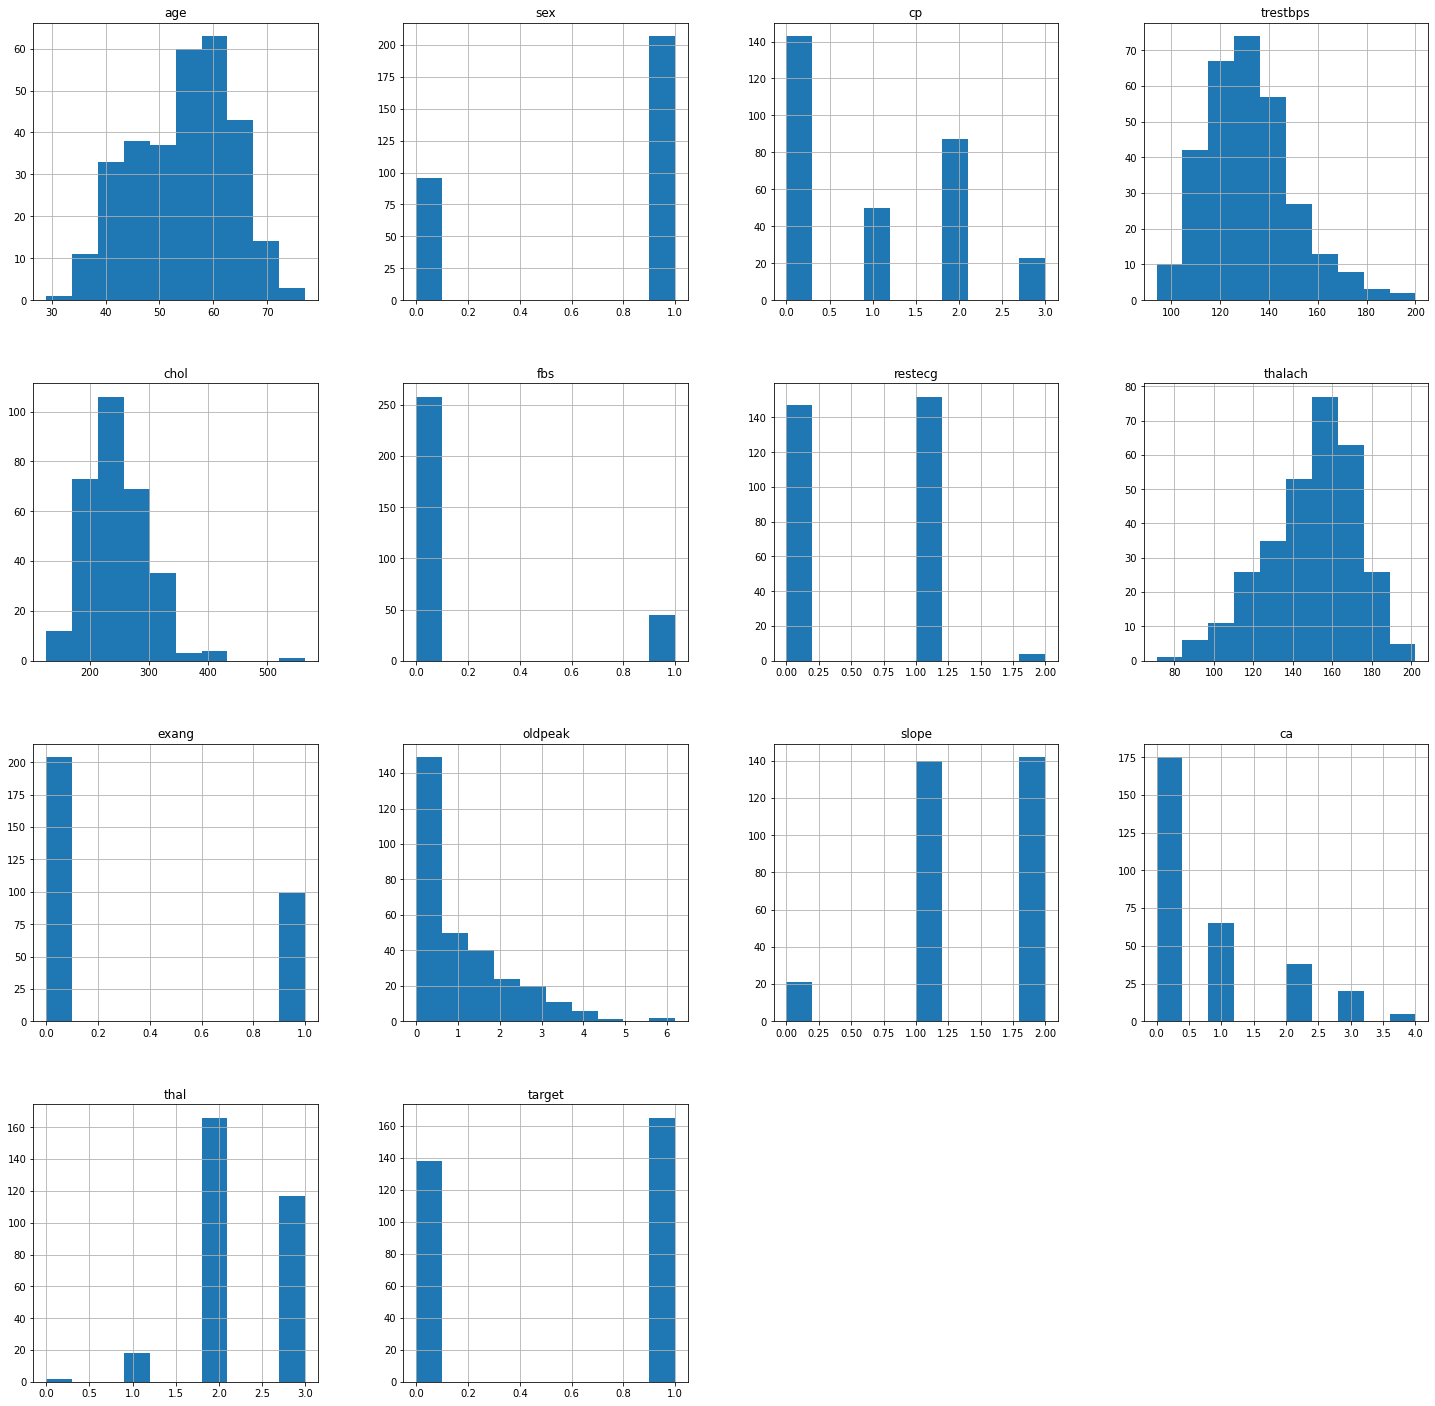

In [36]:
fig = plt.figure(figsize = (25,25))
ax = fig.gca()
dataset.hist(ax = ax)

To Find out the distribution of target column in dataset we plot the bar diagram

In [40]:
dataset['target'].unique()


array([1, 0], dtype=int64)

Text(0.5, 1.0, 'Count of each Target Class')

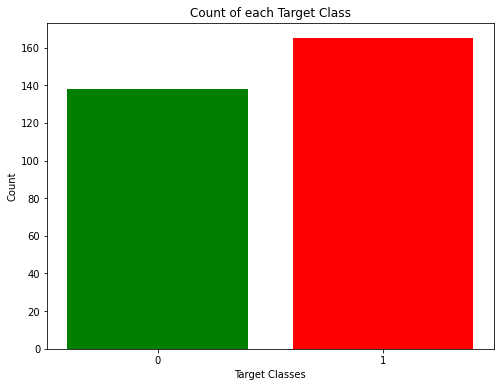

In [42]:
rcParams['figure.figsize']=8,6
plt.bar(dataset['target'].unique(),dataset['target'].value_counts(),color=['red','green'])
plt.xticks(dataset['target'].unique())
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')
 

# Data Processing

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


After exploring the dataset we can see different columns need scaling before using any machine learnig algorithms


In [44]:
dataset=pd.get_dummies(dataset,columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [45]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


Now we use StandardScaler from sklearn to scale the dataset

In [48]:
standardScaler=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale]=standardScaler.fit_transform(dataset[columns_to_scale])

In [49]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


Now the data is ready for model training


# Machine Learning
now we split the dataset into train and test

In [50]:
y=dataset['target']
X=dataset.drop(['target'],axis=1)
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=0)

#### K- Nearest Neighbor Classifier Algorithm

different values of k varies the score of classification therefore we plot for which value of k gives the best scores

In [56]:
knn_scores=[]
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))



Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

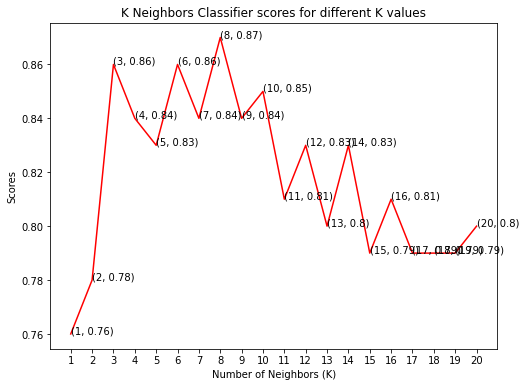

In [57]:
plt.plot([k for k in range(1,21)],knn_scores,color='red' )
for i in range(1,21):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')



from the plot we can see that the best value of k is 8 with score of 0.87

In [59]:
print("The score for K Neighbors Classifier is {}% with {} neighbours.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 87.0% with 8 neighbours.


## Support vector classifier
We will test different kernels in support vector classifier. We will plot some scores and identify which is best


In [62]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for i in range(len(kernels)):
    svc_classifier=SVC(kernel=kernels[i])
    svc_classifier.fit(X_train,y_train)
    svc_scores.append(svc_classifier.score(X_test,y_test))



In [63]:
svc_scores

[0.83, 0.82, 0.81, 0.79]

## We can see linear svc giving better result but lets plot this in a bar graph

linear
poly
rbf
sigmoid


Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

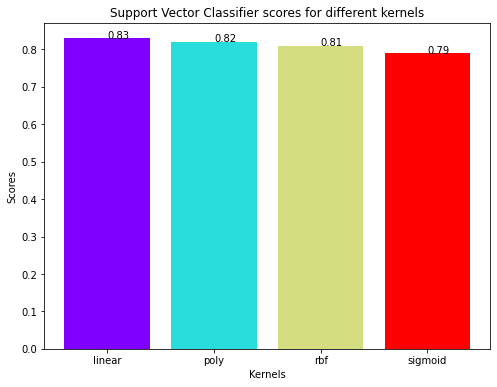

In [82]:
colors=rainbow(np.linspace(0,1,len(kernels)))
plt.bar(kernels,svc_scores,color= colors)
for i in range(len(kernels)):
    plt.text(i,svc_scores[i],svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')




In [67]:
print(f"The score for Support Vector Classifier is {svc_scores[0]*100}% with {'linear'} kernel.")

The score for Support Vector Classifier is 83.0% with linear kernel.


### Decision Tree Classifier
Different max_feature value will be checked to get the best score

In [68]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Lets plot the graph

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

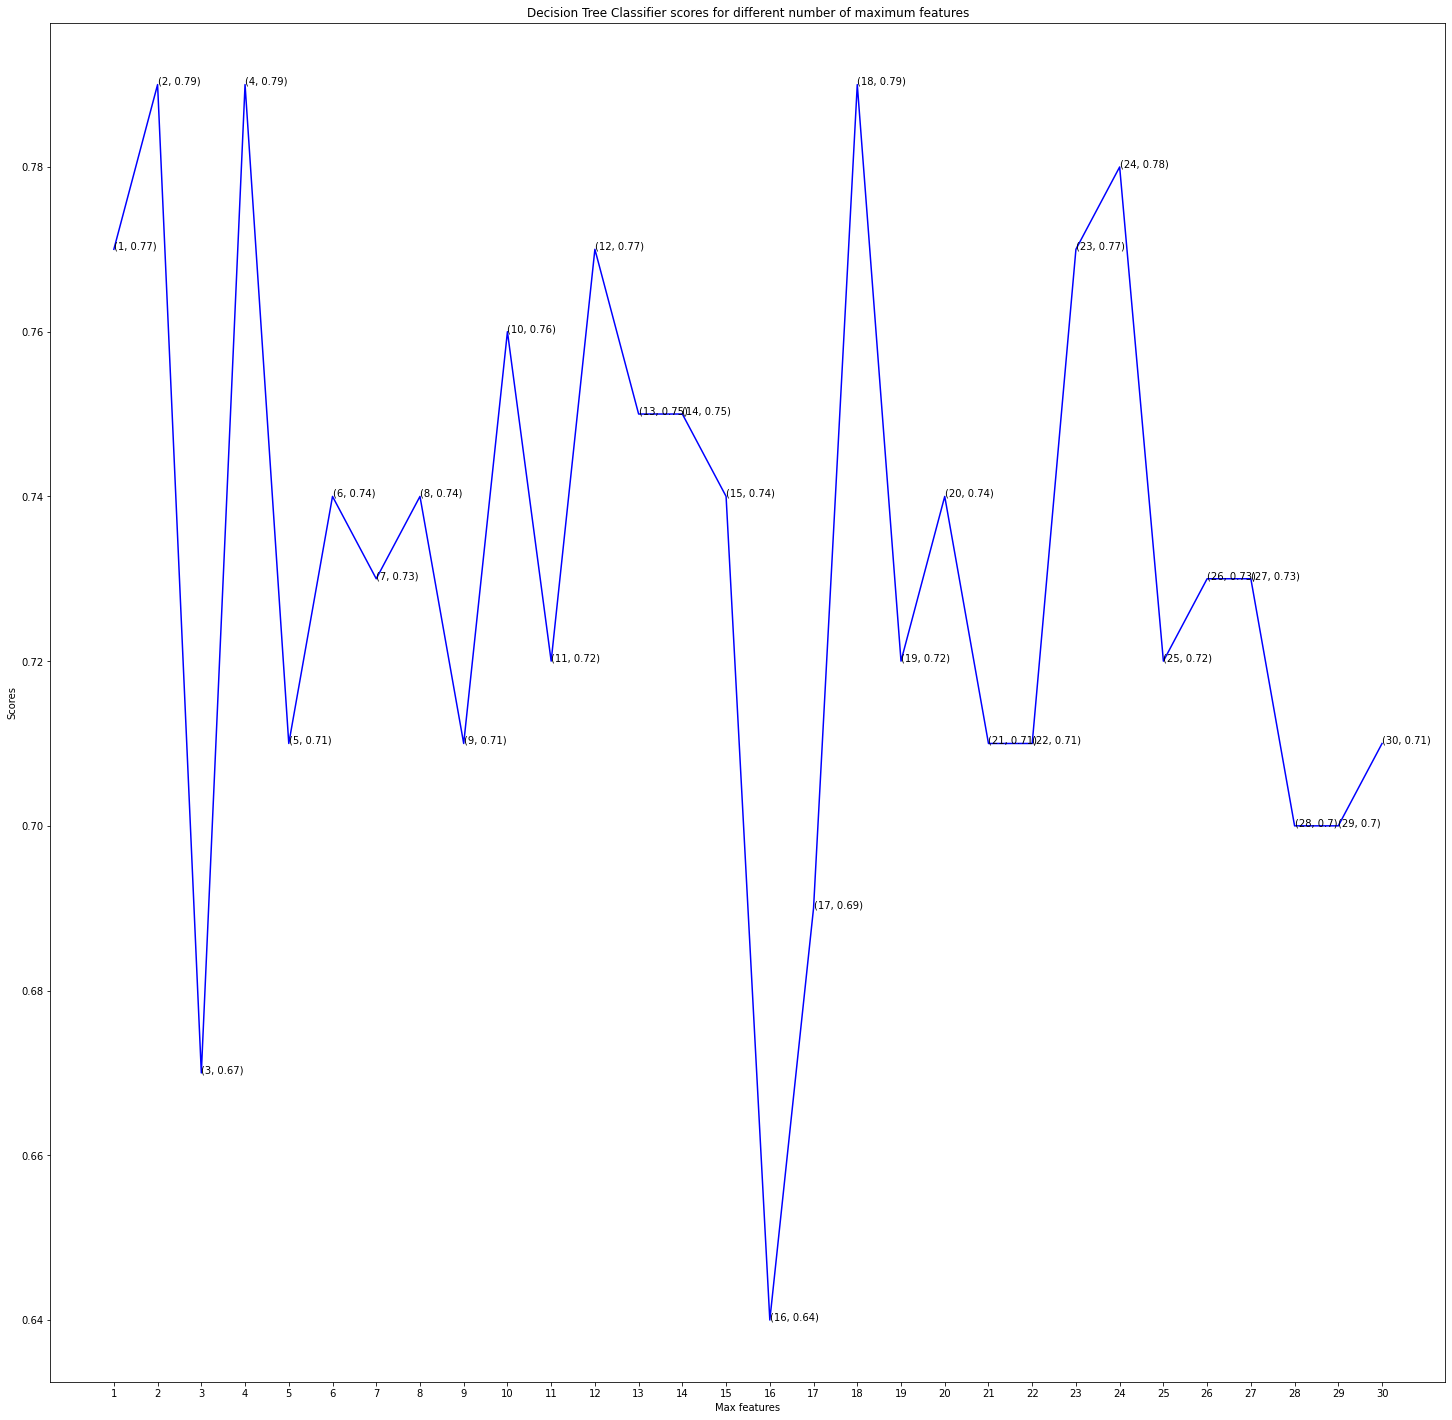

In [75]:
plt.figure(figsize = (25,25))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'blue')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [76]:
print(f"The score for Decision Tree Classifier is {dt_scores[17]*100}% with {[2,4,18]} maximum features." )

The score for Decision Tree Classifier is 79.0% with [2, 4, 18] maximum features.


## Random Forest Classifier

Now we will use ensemble method ,Random Forest classifier  for creating the model and vary the number if estimated to calculate the best score

In [88]:
rf_scores=[]
estimators=[10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier=RandomForestClassifier(n_estimators=i, random_state=0)
    rf_classifier.fit(X_train,y_train)
    rf_scores.append(rf_classifier.score(X_test,y_test))

Now lets plot the score for each estimators in the bar graph

In [91]:
rf_scores

[0.79, 0.84, 0.83, 0.84, 0.83]

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

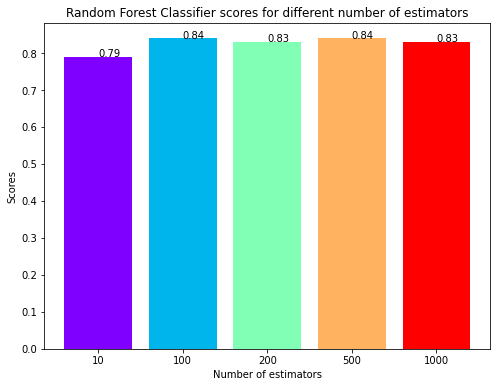

In [98]:
colors=rainbow(np.linspace(0,1,len(estimators)))
plt.bar([i for i in range(len(estimators))],rf_scores,color=colors,width=0.8)
for i in range(len(estimators)):
    plt.text(i,rf_scores[i],rf_scores[i])
plt.xlabel('Number of estimators')
plt.xticks(ticks=[i for i in range(len(estimators))],labels=[str(estimator) for estimator in estimators])
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [99]:
print(f"The score for Random Forest Classifier is {rf_scores[3]*100}% with {[100, 500]} estimators." )

The score for Random Forest Classifier is 84.0% with [100, 500] estimators.
